In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [26]:
df = pd.read_csv('https://drive.google.com/uc?id=1vQbA5YXEVc-NBPpkuZItkY9BTgZwQyYr',  sep=";")
df

,DataHora,Quantos semestres faltam para você se formar?,"Selecione o seu Perfil de Conectividade neste semestre, dentre as opções a seguir:",Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?,"Caso tenha respondido SIM na pergunta anterior, responda: Você desempenhou alguma tarefa envolvendo Visualização de Dados?",Marque as linguagens de programação que você já teve algum contato prático:,Qual a sua idade?,Qual a sua cidade natal? (Responder no formato: CIDADE - UF)
0,22/07/2024 16:23,3,Parcialmente Conectado,Sim,Não,"Java,JavaScript,Python,TypeScript",21-22,Campina Grande - PB
1,18/07/2024 10:22,1,Parcialmente Conectado,Não,Não,"C,Java,JavaScript,Python,R,TypeScript",21-22,CAMPINA GRANDE - PB
2,17/07/2024 12:09,2,Totalmente Conectado,Sim,Sim,"Java,JavaScript,Python,TypeScript",23-24,Campina Grande - PB
3,18/07/2024 12:52,2,Totalmente Conectado,Sim,Sim,"C#,Java,Python,TypeScript",21-22,TEIXEIRA - PB
4,17/07/2024 07:56,1,Parcialmente Conectado,Sim,Não,"Java,JavaScript,Python,TypeScript",21-22,Diadema - SP
...,...,...,...,...,...,...,...,...
64,10/02/2025 12:21,1,Totalmente Conectado,Sim,Sim,"C++,Java,JavaScript,Python,R",21-22,João Pessoa - PB
65,15/02/2025 09:11,0 (este é o último),Totalmente Conectado,Sim,Sim,"Java,JavaScript,Python,R",25-26,Tuparetama - PE
66,13/02/2025 11:37,2,Totalmente Conectado,Sim,Não,"Java,JavaScript,PHP,Python,TypeScript",23-24,Aracaju - SE
67,12/02/2025 00:02,1,Totalmente Conectado,Sim,Sim,"C#,Java,Python",21-22,CAMPINA GRANDE - PB


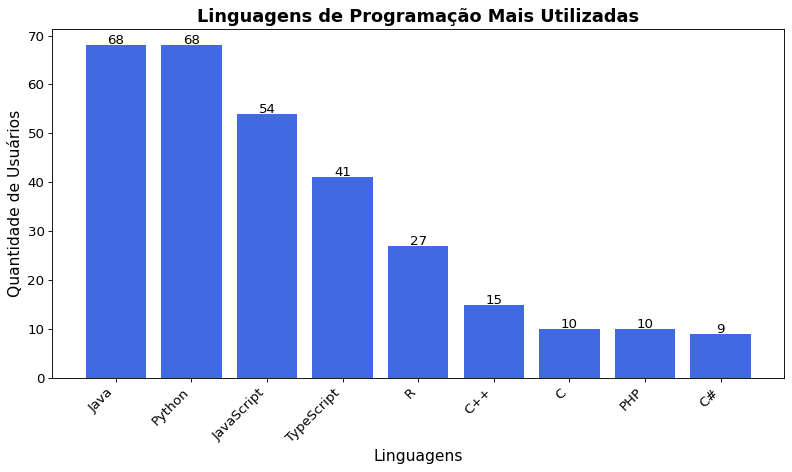

In [27]:
all_languages = [lang for langs in df["Marque as linguagens de programação que você já teve algum contato prático:"] for lang in langs.split(",")]
language_frequency = Counter(all_languages)

language_frequency = dict(sorted(language_frequency.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(language_frequency.keys(), language_frequency.values(), color="royalblue")

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Linguagens", fontsize=14)
plt.ylabel("Quantidade de Usuários", fontsize=14)
plt.title("Linguagens de Programação Mais Utilizadas", fontsize=16, fontweight="bold")

for i, v in enumerate(language_frequency.values()):
    plt.text(i, v + 0.2, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

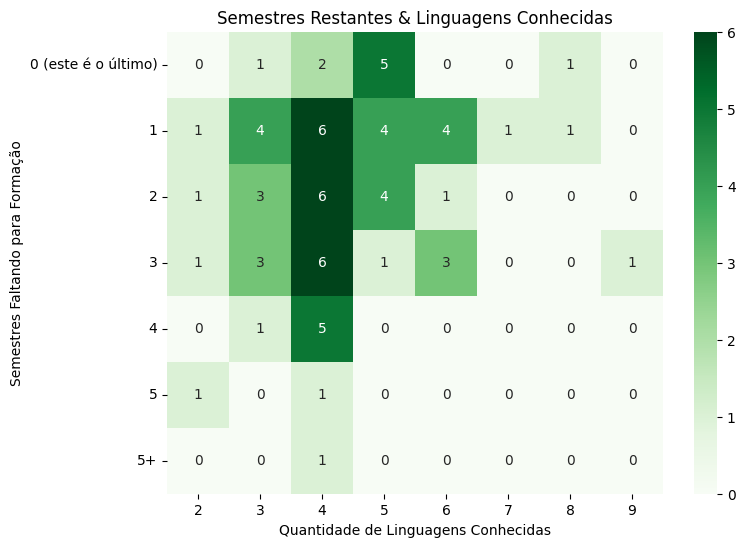

In [43]:
df["Quantidade_Linguagens"] = df["Marque as linguagens de programação que você já teve algum contato prático:"].apply(lambda x: len(x.split(',')))

heatmap_data = df.pivot_table(index="Quantos semestres faltam para você se formar?",
                              columns="Quantidade_Linguagens",
                              aggfunc="size",
                              fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Quantidade de Linguagens Conhecidas")
plt.ylabel("Semestres Faltando para Formação")
plt.title("Semestres Restantes & Linguagens Conhecidas")
plt.show()

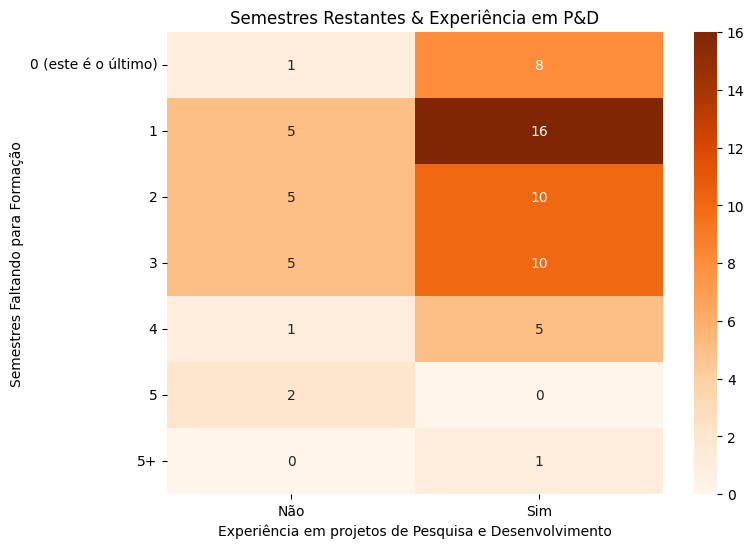

In [40]:
heatmap_data = df.pivot_table(index="Quantos semestres faltam para você se formar?",
                              columns="Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?",
                              aggfunc="size",
                              fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Oranges", fmt="d")
plt.xlabel("Experiência em projetos de Pesquisa e Desenvolvimento")
plt.ylabel("Semestres Faltando para Formação")
plt.title("Semestres Restantes & Experiência em P&D")
plt.show()

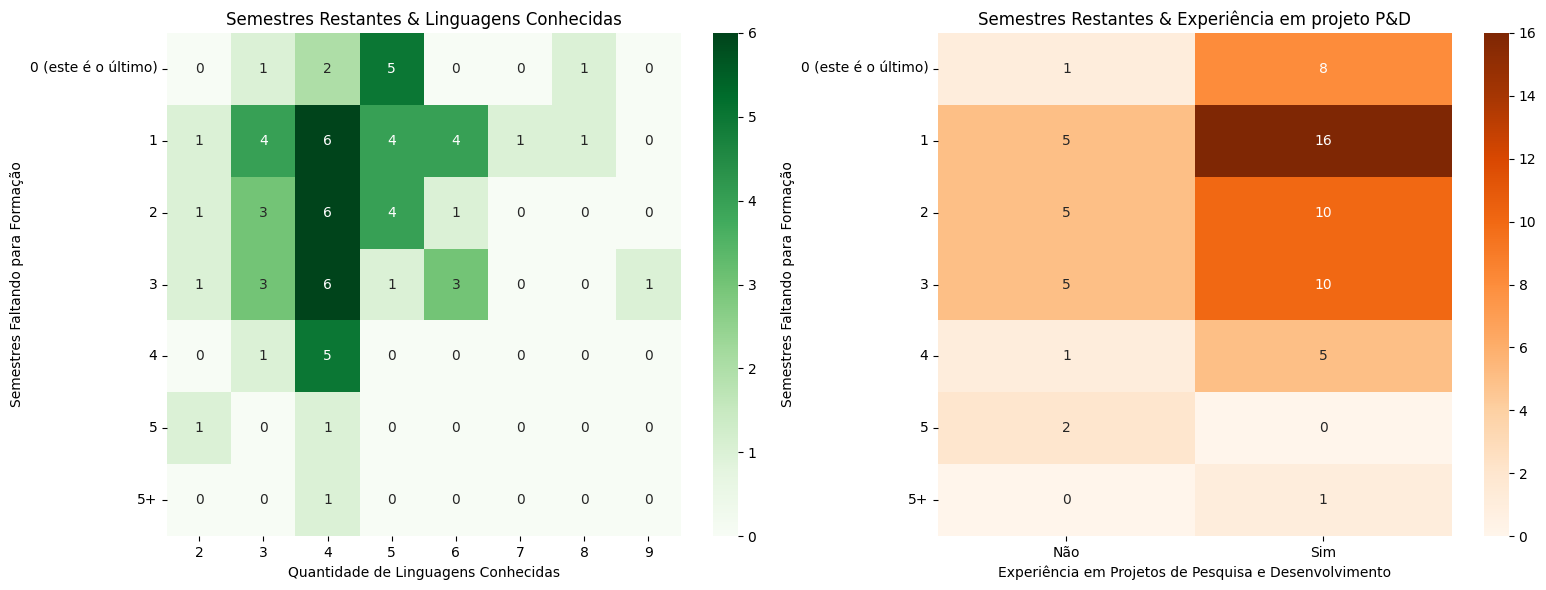

In [36]:
df["Quantidade_Linguagens"] = df["Marque as linguagens de programação que você já teve algum contato prático:"].apply(lambda x: len(x.split(',')))

heatmap_data1 = df.pivot_table(index="Quantos semestres faltam para você se formar?",
                               columns="Quantidade_Linguagens",
                               aggfunc="size",
                               fill_value=0)

heatmap_data2 = df.pivot_table(index="Quantos semestres faltam para você se formar?",
                               columns="Você já teve experiência de participação em projetos de Pesquisa e Desenvolvimento?",
                               aggfunc="size",
                               fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(heatmap_data1, annot=True, cmap="Greens", fmt="d", ax=axes[0])
axes[0].set_xlabel("Número de Linguagens Conhecidas")
axes[0].set_ylabel("Semestres Faltando para Formação")
axes[0].set_title("Semestres Restantes & Linguagens Conhecidas")

sns.heatmap(heatmap_data2, annot=True, cmap="Oranges", fmt="d", ax=axes[1])
axes[1].set_xlabel("Experiência em Projetos de Pesquisa e Desenvolvimento")
axes[1].set_ylabel("Semestres Faltando para Formação")
axes[1].set_title("Semestres Restantes & Experiência em projeto P&D")

plt.tight_layout()
plt.show()
